          0         1         2         3         4         5         6    \
0    1.000000  0.408567  0.817145 -0.019703 -0.053569  0.066652 -0.010633   
1    0.408567  1.000000 -0.008645  0.012885  0.021676  0.002352  0.036350   
2    0.817145 -0.008645  1.000000 -0.012442 -0.091513  0.073132 -0.017854   
3   -0.019703  0.012885 -0.012442  1.000000  0.026839 -0.060644  0.019930   
4   -0.053569  0.021676 -0.091513  0.026839  1.000000 -0.063868  0.004499   
5    0.066652  0.002352  0.073132 -0.060644 -0.063868  1.000000 -0.005803   
6   -0.010633  0.036350 -0.017854  0.019930  0.004499 -0.005803  1.000000   
7   -0.033820 -0.026900  0.005073 -0.082044 -0.012982  0.013901 -0.011398   
8    0.016959  0.040275  0.015018 -0.028666  0.012903  0.007650  0.001028   
9    0.020270 -0.029068  0.029005 -0.031851 -0.052497  0.022368 -0.028098   
10   0.011214  0.004307 -0.014413 -0.005440 -0.020509  0.015181  0.010528   
11  -0.009581  0.007104 -0.023837  0.042939 -0.003767 -0.069943 -0.005990   

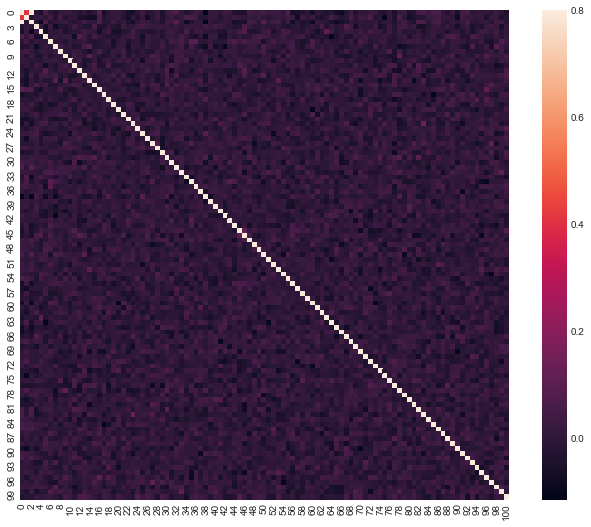

In [1]:
import math
import warnings

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.cross_decomposition import PLSRegression

%matplotlib inline
sns.set_style('white')

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)



# Number of datapoints in outcome.
n = 1000

# Number of features.
p = 100

# Create random normally distributed data for parameters.
X = np.random.normal(size=n * p).reshape((n, p))

# Create normally distributed outcome related to parameters but with noise.
y = X[:, 0] + 2 * X[:, 1] + np.random.normal(size=n * 1) + 5



# Check out correlations. First column is the outcome.
f, ax = plt.subplots(figsize=(12, 9))
corrmat = pd.DataFrame(np.insert(X, 0, y, axis=1)).corr()
print(corrmat)
# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

R-squared regression: 0.8593967747750524
R-squared PLSR: 0.858362903214736


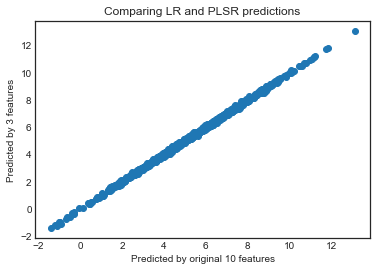

In [2]:
# Fit a linear model with all 10 features.
regr = linear_model.LinearRegression()
regr.fit(X, y)

# Save predicted values.
Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y))

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls1 = PLSRegression(n_components=3)

# Reduce X to R(X) and regress on y.
pls1.fit(X, y)

# Save predicted values.
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, y))

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()